In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data)

In [4]:
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [5]:
df['Target'] = pd.Series(iris.target)

In [6]:
target_names = iris.target_names
target_names # 3 different classifications for iris

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [7]:
df.head() # I prefer column names to be strings, rather than integers.

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
split_perc = 0.7 # I will split the dataset into train/test sets
train = df[:int(df.shape[0] * split_perc)]
test = df[int(df.shape[0] * split_perc):]
# I should do something like CV to make this better, but this is a good start

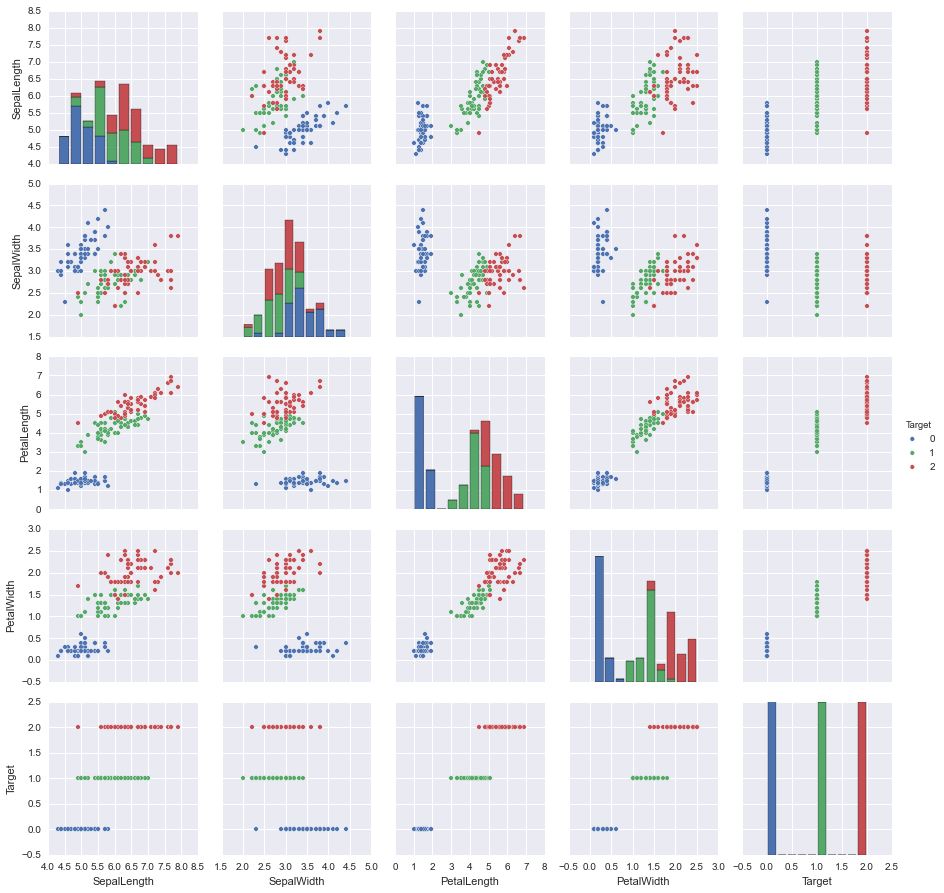

In [9]:
sns.pairplot(df, hue = 'Target')

In [10]:
# I'll try to apply multiclass logistic regression to predict the classifiers 

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
my_model = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', C = 1e5)

In [13]:
X = train[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].as_matrix() # could use ints too
y = train['Target'].as_matrix()

In [14]:
my_fit = my_model.fit(X, y)

In [15]:
my_fit.coef_

array([[  9.22311747,   8.65466974, -17.71338914, -12.09399266],
       [  2.79659848,  -1.65002621,  -3.71197415, -12.2394197 ],
       [-12.01971596,  -7.00464353,  21.42536329,  24.33341235]])

In [16]:
my_fit.intercept_

array([ 12.87378056,  38.65223114, -51.52601171])

In [17]:
my_score = my_fit.score(test[[0,1,2,3]], test['Target'])

In [18]:
my_score # not bad for a first go - CV will help.  Also play with adjusting regularization parameter

0.75555555555555554